In [1]:
import pandas as pd  
import numpy as   np 


# Duplicate Labels

In [2]:
s1 = pd.Series([0, 1, 2], index=["a", "b", "b"])

In [3]:
s1.reindex(["a", "b", "c"])

ValueError: cannot reindex on an axis with duplicate labels

In [ ]:
df1 = pd.DataFrame([[0, 1, 2], [3, 4, 5]], columns=["A", "A", "B"])
df1

,A,A,B
0,0,1,2
1,3,4,5


We have duplicates in the columns. If we slice 'B', we get back a Series

In [ ]:
df1['B']

0    2
1    5
Name: B, dtype: int64

But slicing 'A' returns a DataFrame

In [ ]:
df1['A']

,A,A
0,0,1
1,3,4


This applies to row labels as well



In [ ]:
df2 = pd.DataFrame({"A": [0, 1, 2]}, index=["a", "a", "b"])
df2

,A
a,0
a,1
b,2


In [ ]:
df2.loc["b", "A"]

np.int64(2)

In [ ]:
df2.loc["a", "A"] 

a    0
a    1
Name: A, dtype: int64

# Duplicate Label Detection

In [ ]:
df2

,A
a,0
a,1
b,2


In [ ]:
df2.index.is_unique

False

In [ ]:
df2.columns.is_unique

True

In [ ]:
df2.index.duplicated()

array([False,  True, False])

In [ ]:
df2.loc[~df2.index.duplicated(), :]

,A
a,0
b,2


#  Disallowing Duplicate Labels

In [ ]:
pd.DataFrame([[0, 1, 2], [3, 4, 5]], columns=["A", "B", "C"],).set_flags(
    allows_duplicate_labels=False
)


,A,B,C
0,0,1,2
1,3,4,5


# Chart visualization

In [7]:
import matplotlib.pyplot as plt  
plt.close("all")

Basic plotting: plot

In [ ]:
np.random.seed(123456)


<Axes: >

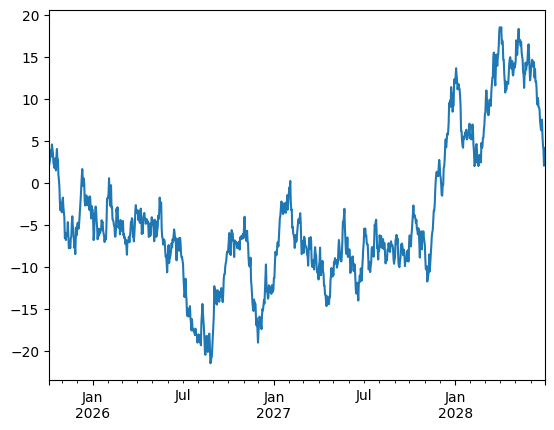

In [11]:
ts = pd.Series(np.random.randn(1000),index = pd.date_range('10/5/2025',periods=1000))
ts = ts.cumsum()
ts.plot()


On DataFrame, plot() is a convenience to plot all of the columns with labels

<Axes: >

<Figure size 640x480 with 0 Axes>

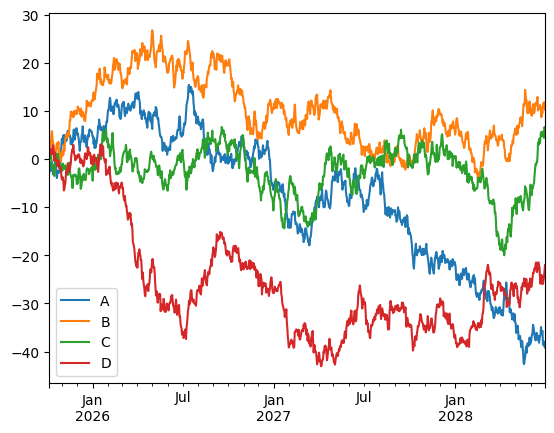

In [21]:
df = pd.DataFrame(np.random.randn(1000,4),index = ts.index , columns=list('ABCD'))
df = df.cumsum()
plt.figure()
df.plot()